# Cat Vs Non Cat Images
This model will try to identify whether a given image is a cat or not. It uses a Convoutional Neural Network built using Keras.

The dataset used is pulled from Kaggle, which you can find [here](https://www.kaggle.com/mriganksingh/cat-images-dataset)

## Loading the dataset

Dataset contains these objects: list_classes, train_set_x, train_set_y, 

Following are some images from the dataset:
Shape of a single image: (64, 64, 3)
We have 209 training images and 50 test images


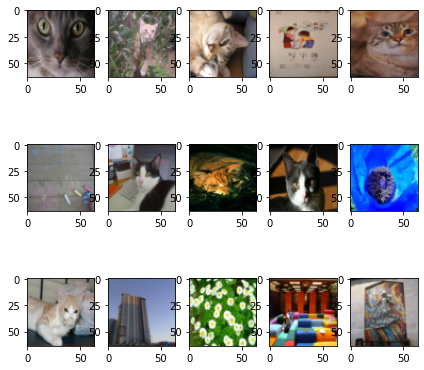

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

train_file = h5py.File('./data/train_catvnoncat.h5', 'r')
test_file = h5py.File('./data/test_catvnoncat.h5', 'r')

print('Dataset contains these objects: ', end = '')
for key in train_file.keys():
    print(key, end = ', ')
    
# Load training data in numpy
X_train = np.array(train_file['train_set_x'][:])
y_train = np.array(train_file['train_set_y'][:])
y_train = keras.utils.to_categorical(y_train, num_classes=2)

# Load development data in numpy
X_test = np.array(test_file['test_set_x'][:])
y_test = np.array(test_file['test_set_y'][:])
y_test = keras.utils.to_categorical(y_test, num_classes=2)

# Shuffle data
train_indices = np.arange(X_train.shape[0])
test_indices = np.arange(X_test.shape[0])

np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

X_train = X_train[train_indices]
y_train = y_train[train_indices]

X_test = X_test[test_indices]
y_test = y_test[test_indices]

# Plot some of the example images
print('\n\nFollowing are some images from the dataset:')
n_rows = 3
n_cols = 5
f, axarr = plt.subplots(n_rows, n_cols, figsize = (7,7))
idx = 0
for i in range(n_rows):
    for j in range(n_cols):
        axarr[i,j].imshow(X_train[idx])
        idx += 1
print('Shape of a single image:', X_train[0].shape)
print(f'We have {X_train.shape[0]} training images and {X_test.shape[0]} test images')

## Creating the model in Keras

In [2]:
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(4, kernel_size = (4, 4), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization(center=True, scale=True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization(center=True, scale=True))
model.add(keras.layers.Conv2D(8, kernel_size = (8, 8), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization(center=True, scale=True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization(center=True, scale=True))
model.add(keras.layers.Conv2D(16, kernel_size = (8, 8), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization(center=True, scale=True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization(center=True, scale=True))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization(center=True, scale=True))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.BatchNormalization(center=True, scale=True))
model.add(keras.layers.Dense(units=2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 4)         196       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 4)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 4)         16        
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 4)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 4)         16        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         2056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0

## Training the model

In [3]:
#Set epochs
epochs = 25

#Clear output
import IPython
import time
class ClearTrainingOutput(keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output()
    
#Fit the model
start_time = time.time()
trained_model = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])
end_time = time.time()
print(f'That took {end_time - start_time:.2f} seconds')

That took 28.14 seconds


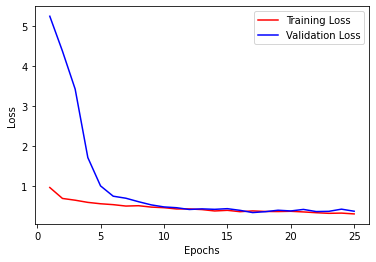

In [4]:
# Print the learning curve
plt.plot(range(1, epochs+1), trained_model.history['loss'] , 'r', range(1, epochs+1), trained_model.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
_ = plt.legend(['Training Loss', 'Validation Loss'])

Max Accuracy Reached: 86.00 %


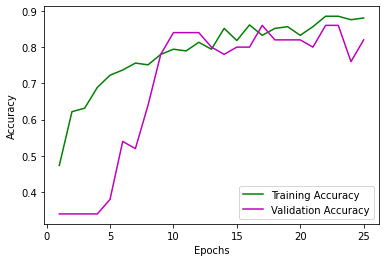

In [5]:
# Print the Accuracy curve
plt.plot(range(1, epochs+1), trained_model.history['accuracy'] , 'g', range(1, epochs+1), trained_model.history['val_accuracy'], 'm')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
print('Max Accuracy Reached: {0:0.2f} %'.format((max(trained_model.history['val_accuracy']) * 100)) )

## Final discussions
The model here is pretty simple. I handpicked the hyperparameters that seemed to work best. There is scope for further improvement in this model. However, with only 209 examples in our training and 50 images in our development set, this was the best the model could do without overfitting the data in my opinion.

### Let's look at the confusion matrix of the model

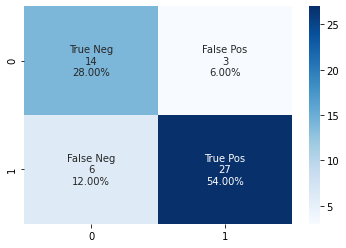

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# We do not have test data so let's look at the confusion matrix of the development data
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis = 1)
cf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), y_test_pred)

# Code taken from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# Courtesy of T. Dennis to make this useful piece for visualization using confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
_ = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')